In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [2]:
!pip install pycountry
!pip install wordcloud

  Using cached pycountry-22.3.5.tar.gz (10.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=c7e4cb341a43ca4a76c498ada5e9e55cc2d1ab13cf6872f982ea2631151af9bb
  Stored in directory: c:\users\51588\appdata\local\pip\cache\wheels\e2\aa\0f\c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [5]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
!pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0a2c5eb0bc9c8c07f9a1ffc91e5d9b83d0f854b47bef7fe050fd34f57469ae88
  Stored in directory: c:\users\51588\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [6]:
# Authentication
consumerKey = "hJmggDw6NDQHKwG8jPyOXYOTF"
consumerSecret = "Cbenb7TZ1roUgOMQJXZyEAfa6uSCexZCs11OQK6SudHzi85Nlr"
accessToken = "1119118220-d8eImP8yfDiC14wUydvDKS8uff9YjM2k28by0wl"
accessTokenSecret = "fxz6DqN2RQorPtVFsKcAFST22ICbZ2IC0z8j6zJFwG5aX"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [11]:
# Get tweets by country and data

places = api.search_geo(query="USA", granularity="country")
place_id = places[0].id

print(place_id)

96683cc9126741d1


In [44]:
query = "Putin war profile_country:96683cc9126741d1"
tweet_results  = api.search_full_archive(label='dev', query=query, fromDate="202203010000", toDate="202203310000", maxResults=100)

HTTPException: 422 Unprocessable Entity
There were errors processing your request: Reference to invalid operator 'profile_country'. Operator is not available in current product or product packaging. Please refer to complete available operator list at http://t.co/operators. (at position 11), Profile Country Code: '96683cc9126741d1', must be composed of only alphabetic characters (at position 1), Profile Country Code: '96683cc9126741d1', is longer than the required two character country code (at position 1)

In [25]:
print(tweet_results)

[Status(_api=<tweepy.api.API object at 0x000001A448E14C40>, _json={'created_at': 'Wed Mar 30 22:59:56 +0000 2022', 'id': 1509304448795000838, 'id_str': '1509304448795000838', 'text': '#StandWithUkraine fully &amp; #StopPutin already!\n\ncc: @POTUS @JoeBiden, @VP @KamalaHarris, @StateDept, @SecBlinken,… https://t.co/cMKpQyl9iv', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 31476142, 'id_str': '31476142', 'name': 'Janette Dean 🇺🇸 #StopPutin & help Ukraine 🇺🇦!', 'screen_name': 'JanetteD', 'location': 'Caledonia, MN by La Crosse, WI', 'url': 'https://lacrossetribune.com/search/?nsa=eedition&q=Janette+Dean', 'description': 'Environmentalist & Human Rights Advocate. UNR/USC. Democrat. MN/WI. Protect earth & democracy vs. corruption & discrimination! #StopPutin,

In [29]:
import pandas as pd
df = pd.DataFrame([tweet_x._json for tweet_x in tweet_results])

print(df)

                        created_at                   id               id_str  \
0   Wed Mar 30 22:59:56 +0000 2022  1509304448795000838  1509304448795000838   
1   Wed Mar 30 20:56:41 +0000 2022  1509273428871852042  1509273428871852042   
2   Wed Mar 30 15:17:40 +0000 2022  1509188113985331206  1509188113985331206   
3   Wed Mar 30 14:36:51 +0000 2022  1509177842789240836  1509177842789240836   
4   Tue Mar 29 22:31:20 +0000 2022  1508934861981114369  1508934861981114369   
..                             ...                  ...                  ...   
89  Tue Mar 01 22:53:12 +0000 2022  1498793503584923651  1498793503584923651   
90  Tue Mar 01 20:51:41 +0000 2022  1498762923065421829  1498762923065421829   
91  Tue Mar 01 17:51:55 +0000 2022  1498717683084369923  1498717683084369923   
92  Tue Mar 01 12:20:42 +0000 2022  1498634329701945349  1498634329701945349   
93  Tue Mar 01 10:52:15 +0000 2022  1498612071700774913  1498612071700774913   

                                       

In [30]:
df.to_csv('sample_USA.csv')

In [49]:

query = "ukraine war place_country:GB lang:en"
tweet_cn_results  = api.search_full_archive(label='dev', query=query, fromDate="202203010000", toDate="202203020000", maxResults=100)

In [50]:
df = pd.DataFrame([tweet_x._json for tweet_x in tweet_cn_results])

print(df)
df.to_csv('sample_Putin_PL.csv')

                        created_at                   id               id_str  \
0   Tue Mar 01 23:40:23 +0000 2022  1498805381224615938  1498805381224615938   
1   Tue Mar 01 23:32:16 +0000 2022  1498803335897530373  1498803335897530373   
2   Tue Mar 01 23:24:16 +0000 2022  1498801323696869377  1498801323696869377   
3   Tue Mar 01 23:20:14 +0000 2022  1498800306330783748  1498800306330783748   
4   Tue Mar 01 23:12:49 +0000 2022  1498798440742109186  1498798440742109186   
..                             ...                  ...                  ...   
95  Tue Mar 01 15:38:04 +0000 2022  1498684001497800705  1498684001497800705   
96  Tue Mar 01 15:27:08 +0000 2022  1498681250298707969  1498681250298707969   
97  Tue Mar 01 15:07:38 +0000 2022  1498676340618407940  1498676340618407940   
98  Tue Mar 01 15:01:03 +0000 2022  1498674682945589257  1498674682945589257   
99  Tue Mar 01 14:54:48 +0000 2022  1498673111482445845  1498673111482445845   

                                       

In [23]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "ukrainewar london";
noOfTweet = 1500


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
print(tweets)
# positive  = 0
# negative = 0
# neutral = 0
# polarity = 0
# tweet_list = []
# neutral_list = []
# negative_list = []
# positive_list = []

# for tweet in tweets:
    
#     #print(tweet.text)
#     tweet_list.append(tweet.text)
#     analysis = TextBlob(tweet.text)
#     score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
#     neg = score['neg']
#     neu = score['neu']
#     pos = score['pos']
#     comp = score['compound']
#     polarity += analysis.sentiment.polarity
    
#     if neg > pos:
#         negative_list.append(tweet.text)
#         negative += 1

#     elif pos > neg:
#         positive_list.append(tweet.text)
#         positive += 1
    
#     elif pos == neg:
#         neutral_list.append(tweet.text)
#         neutral += 1

# positive = percentage(positive, noOfTweet)
# negative = percentage(negative, noOfTweet)
# neutral = percentage(neutral, noOfTweet)
# polarity = percentage(polarity, noOfTweet)
# positive = format(positive, '.1f')
# negative = format(negative, '.1f')
# neutral = format(neutral, '.1f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  395
positive number:  103
negative number:  118
neutral number:  174


In [7]:
tweet_list

,0
0,UK detains Russian-owned superyacht in London’...
1,"RT @Andrew_J_G: ""We know Ukrainian activists w..."
2,"RT @Andrew_J_G: ""We know Ukrainian activists w..."
3,"RT @Andrew_J_G: ""We know Ukrainian activists w..."
4,"""We know Ukrainian activists who are hopping m..."
...,...
390,RT @RichardHewison: Putin. Is. Hitler.\n\nThey...
391,RT @RichardHewison: Putin. Is. Hitler.\n\nThey...
392,RT @GarySyms: Around 10Mn #Ukrainians have now...
393,Around 10Mn #Ukrainians have now fled from the...


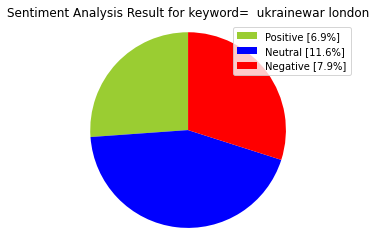

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [12]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,UK detains Russian-owned superyacht in London’...,UK detains Russian-owned superyacht in London’...
1,"RT @Andrew_J_G: ""We know Ukrainian activists w...","RT @Andrew_J_G: ""We know Ukrainian activists w..."
4,"""We know Ukrainian activists who are hopping m...","""We know Ukrainian activists who are hopping m..."
5,REFUGEES NOT WELCOME BY WHOM IN SENIOR OFFICE?...,REFUGEES NOT WELCOME BY WHOM IN SENIOR OFFICE?...
6,London cabbies rally to help Ukrainian refugee...,London cabbies rally to help Ukrainian refugee...
...,...,...
385,"RT @LFPress: At Ukraine's border, a #ldnont nu...","RT @LFPress: At Ukraine's border, a #ldnont nu..."
388,"At Ukraine's border, a #ldnont nurse is helpin...","At Ukraine's border, a #ldnont nurse is helpin..."
392,RT @GarySyms: Around 10Mn #Ukrainians have now...,RT @GarySyms: Around 10Mn #Ukrainians have now...
393,Around 10Mn #Ukrainians have now fled from the...,Around 10Mn #Ukrainians have now fled from the...


In [10]:
tweet_list

,0,text
0,"RT @chicago_commune: ""The looming disaster is ...","RT @chicago_commune: ""The looming disaster is ..."
1,"🇷🇺 weszli do Sławutycz (zach. Od Czernichowa, ...","🇷🇺 weszli do Sławutycz (zach. Od Czernichowa, ..."
2,RT @KyivIndependent: ⚡️WHO: Attacks on hospita...,RT @KyivIndependent: ⚡️WHO: Attacks on hospita...
3,RT @nytimes: The International Committee of th...,RT @nytimes: The International Committee of th...
4,RT @KyivIndependent: ⚡️Train station exhibit i...,RT @KyivIndependent: ⚡️Train station exhibit i...
...,...,...
1494,"RT @Journotopia: Outside Lviv station, which i...","RT @Journotopia: Outside Lviv station, which i..."
1495,RT @MaajidNawaz: WATCH: \n\nPhenomenal intervi...,RT @MaajidNawaz: WATCH: \n\nPhenomenal intervi...
1496,Ukraine LIVE: Putin war unravels as 7th genera...,Ukraine LIVE: Putin war unravels as 7th genera...
1498,@PMaurerICRC @ICRC It’s not a conflict in Ukra...,@PMaurerICRC @ICRC It’s not a conflict in Ukra...


In [13]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,UK detains Russian-owned superyacht in London’...,uk detains russian owned superyacht in london ...
1,"RT @Andrew_J_G: ""We know Ukrainian activists w...",we know ukrainian activists who are hopping ...
4,"""We know Ukrainian activists who are hopping m...",we know ukrainian activists who are hopping m...
5,REFUGEES NOT WELCOME BY WHOM IN SENIOR OFFICE?...,refugees not welcome by whom in senior office ...
6,London cabbies rally to help Ukrainian refugee...,london cabbies rally to help ukrainian refugee...
7,RT @tengely_evans: Excellent @STWuk meeting in...,excellent meeting in newham east london t...
8,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...
9,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...
10,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...
11,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...


In [14]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,UK detains Russian-owned superyacht in London’...,uk detains russian owned superyacht in london ...,0.000,0.0,neutral,0.000,1.000,0.000,0.0000
1,"RT @Andrew_J_G: ""We know Ukrainian activists w...",we know ukrainian activists who are hopping ...,-0.625,1.0,negative,0.263,0.737,0.000,-0.6908
4,"""We know Ukrainian activists who are hopping m...",we know ukrainian activists who are hopping m...,-0.625,1.0,negative,0.167,0.833,0.000,-0.4939
5,REFUGEES NOT WELCOME BY WHOM IN SENIOR OFFICE?...,refugees not welcome by whom in senior office ...,-0.400,0.9,negative,0.184,0.816,0.000,-0.3570
6,London cabbies rally to help Ukrainian refugee...,london cabbies rally to help ukrainian refugee...,0.000,0.0,negative,0.235,0.602,0.163,-0.2960
7,RT @tengely_evans: Excellent @STWuk meeting in...,excellent meeting in newham east london t...,1.000,1.0,positive,0.000,0.730,0.270,0.5719
8,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...,0.000,0.0,neutral,0.000,1.000,0.000,0.0000
9,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...,0.000,0.0,neutral,0.000,1.000,0.000,0.0000
10,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...,0.000,0.0,neutral,0.000,1.000,0.000,0.0000
11,#StandWithUkraine #SlavaUkraini #UkraineWar ...,standwithukraine slavaukraini ukrainewar ...,0.000,0.0,neutral,0.000,1.000,0.000,0.0000


In [15]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [16]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,102,46.58
positive,62,28.31
negative,55,25.11


In [19]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

NameError: name 'pc' is not defined

In [62]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [63]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [25]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

Word Cloud Saved Successfully


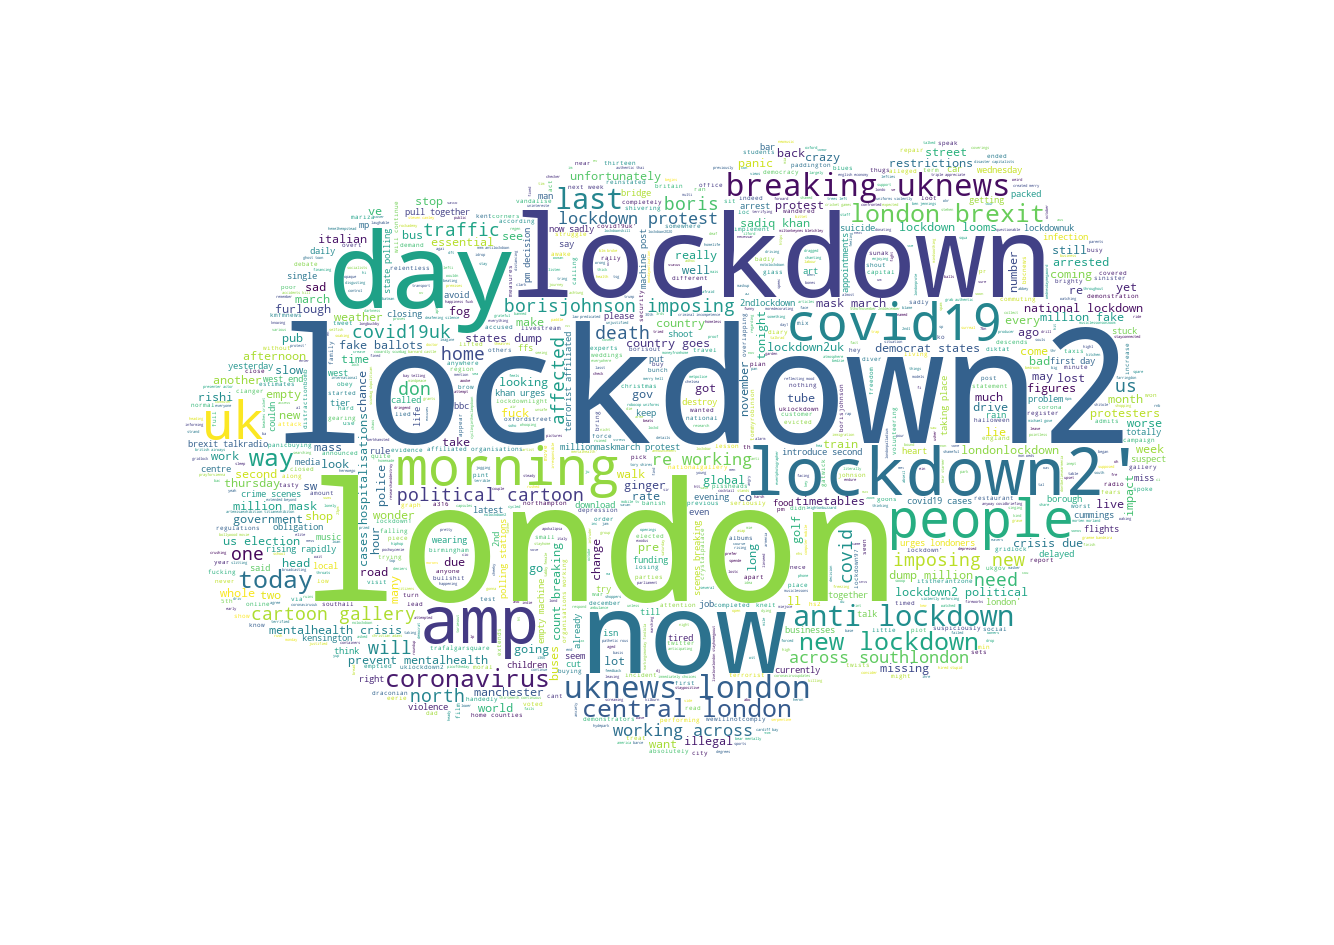

In [87]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


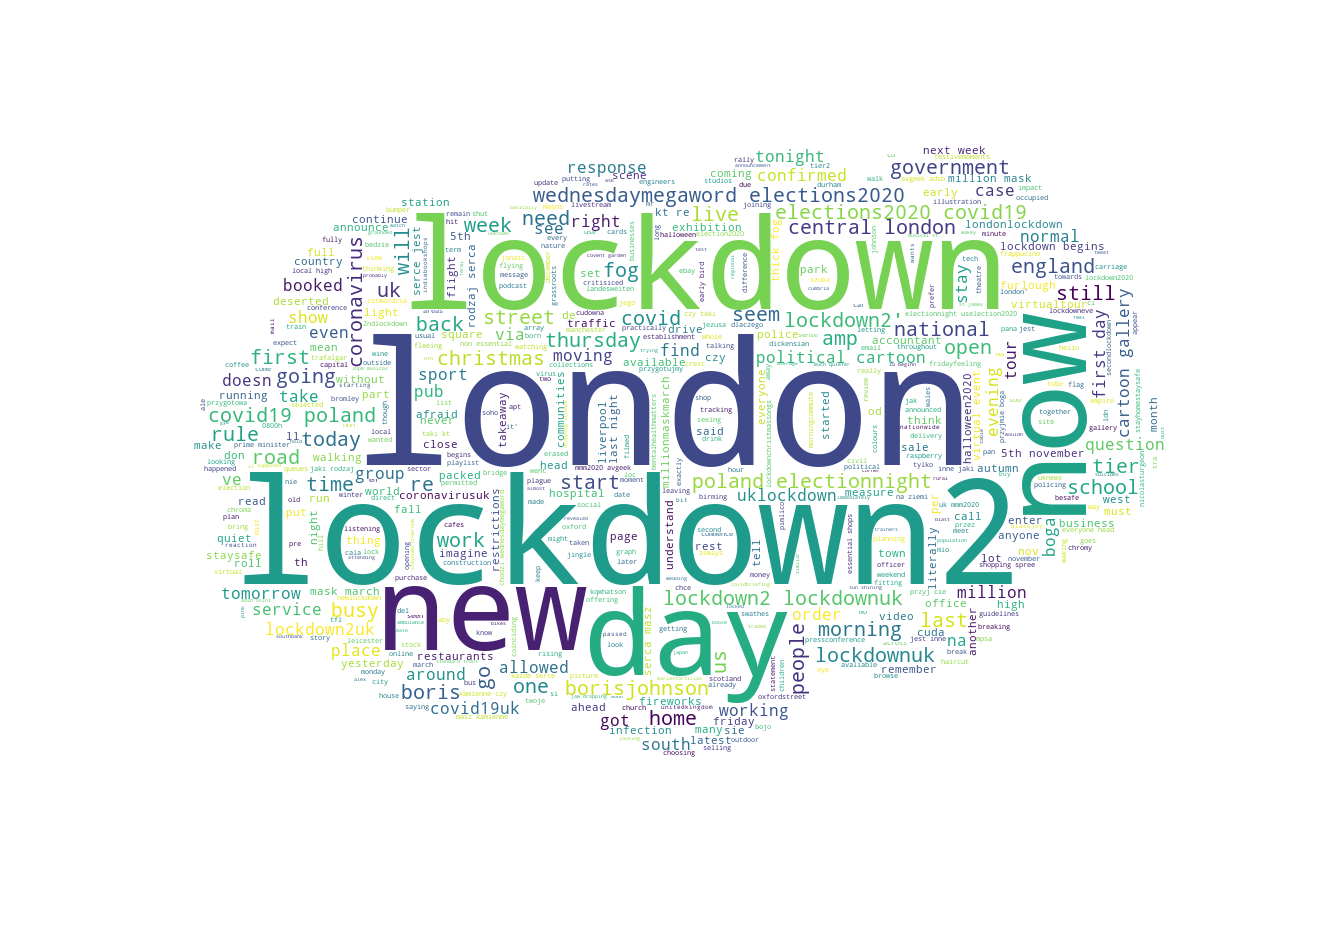

In [88]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [96]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [94]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,109.17
neutral,97.20
positive,108.87


In [95]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.48
neutral,14.70
positive,17.99


In [97]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [98]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [99]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [100]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [104]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [111]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Petethestreet1: #loweringsun on #christmas...,loweringsun on christmaslights thestrand ...,0.700,0.600000,positive,0.000,0.847,0.153,0.4404,121,18,loweringsun on christmaslights thestrand ...,"[, loweringsun, on, christmaslights, thestrand...","[, loweringsun, christmaslights, thestrand, no...","[, loweringsun, christmaslight, thestrand, nor..."
1,"RT @LondonEconomic: Protesters, very few of wh...",protesters very few of whom were wearing fac...,-0.260,0.130000,positive,0.079,0.747,0.174,0.5106,121,20,protesters very few of whom were wearing fac...,"[, protesters, very, few, of, whom, were, wear...","[, protesters, wearing, face, coverings, began...","[, protest, wear, face, cover, began, walk, st..."
3,Photo Journal - Day 01\n\n#lockdown2 #lockdown...,photo journal day 01 lockdown2 lockdown20...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,97,11,photo journal day lockdown lockdown red...,"[photo, journal, day, lockdown, lockdown, redb...","[photo, journal, day, lockdown, lockdown, redb...","[photo, journal, day, lockdown, lockdown, redb..."
4,God love 'em - @SlowRichies opened the doors o...,god love em opened the doors of their res...,0.375,0.466667,positive,0.000,0.730,0.270,0.7430,107,19,god love em opened the doors of their res...,"[god, love, em, opened, the, doors, of, their,...","[god, love, em, opened, doors, restaurant, pec...","[god, love, em, open, door, restaur, peckham, ..."
5,So might wear my #addidas #prideshorts for #lo...,so might wear my addidas prideshorts for lo...,0.000,0.000000,neutral,0.000,1.000,0.000,0.0000,113,12,so might wear my addidas prideshorts for lo...,"[so, might, wear, my, addidas, prideshorts, fo...","[might, wear, addidas, prideshorts, lockdown, ...","[might, wear, addida, prideshort, lockdown, ha..."


In [110]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1281 Number of reviews has 2966 words


In [112]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aba,abbey,abc,abi,abo,abseil,absolut,ac,acab,...,zatwardzia,zdo,ze,zero,ziemi,znadziesz,zo,zoo,zoom,zu
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,976
london,793
day,110
covid,106
amp,82
uk,70
go,67
new,67
last,61
morn,60


In [116]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [117]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('london lockdown2', 81),
 ('lockdown2 london', 58),
 ('day lockdown2', 30),
 ('central london', 29),
 ('wednesdaymegaword elections2020', 27),
 ('lockdown lockdown2', 26),
 ('new lockdown', 23),
 ('lockdown2 lockdownuk', 23),
 ('elections2020 covid19', 23),
 ('gallery london', 22),
 ('covid19 poland', 21),
 ('london lockdown', 20),
 ('lockdown2 lockdown', 20),
 ('political cartoon', 18),
 ('cartoon gallery', 18),
 ('london new', 16),
 ('national lockdown', 16),
 ('uknews london', 15),
 ('lockdown london', 14),
 ('breaking uknews', 14)]

In [118]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('wednesdaymegaword elections2020 covid19', 23),
 ('elections2020 covid19 poland', 20),
 ('political cartoon gallery', 18),
 ('cartoon gallery london', 17),
 ('breaking uknews london', 14),
 ('covid19 poland electionnight', 12),
 ('million mask march', 11),
 ('missing ginger tabby', 11),
 ('ginger tabby female', 11),
 ('uknews london brexit', 10),
 ('lockdown lockdown2 political', 10),
 ('lockdown2 political cartoon', 10),
 ('borisjohnson imposing new', 10),
 ('imposing new lockdown', 10),
 ('new lockdown lockdown2', 10),
 ('findlola missing ginger', 9),
 ('tabby female lostcat', 9),
 ('female lostcat stokenewington', 9),
 ('lostcat stokenewington n16', 9),
 ('stokenewington n16 london', 9)]